<a href="https://colab.research.google.com/github/AndreaMaldera/Insurance-Cross-Selling/blob/main/Insurance_Cross_Selling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
df = pd.read_csv("insurance_cross_sell.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
duplicates = df.duplicated().sum()
duplicates

0

In [ ]:
class_counts = df["Response"].value_counts()
ratio = class_counts[1]/class_counts[0]
print(f"Rapporto tra classe 1 e classe 0: {ratio*100:.2f}%")

Rapporto tra classe 1 e classe 0: 13.97%


###Analisi grafica variabili discrete

In [ ]:
def countplot(column, data, title=None, xlabel=None, ylabel="Count"):

    sns.set_theme(style="whitegrid")
    sns.countplot(x=column, data=data)

    if title is None:
        title = f"Distribuzione {column}"
    if xlabel is None:
        xlabel = column

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

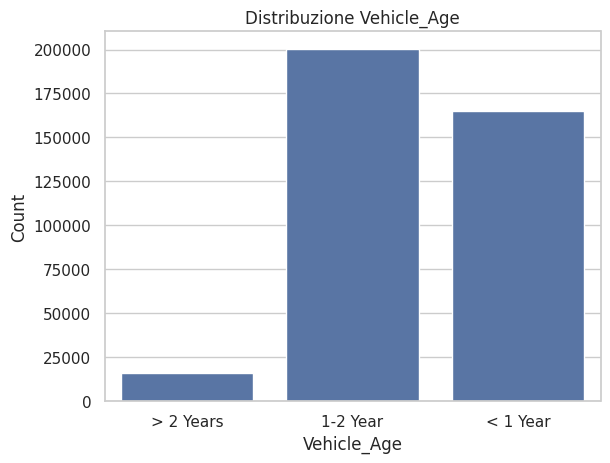

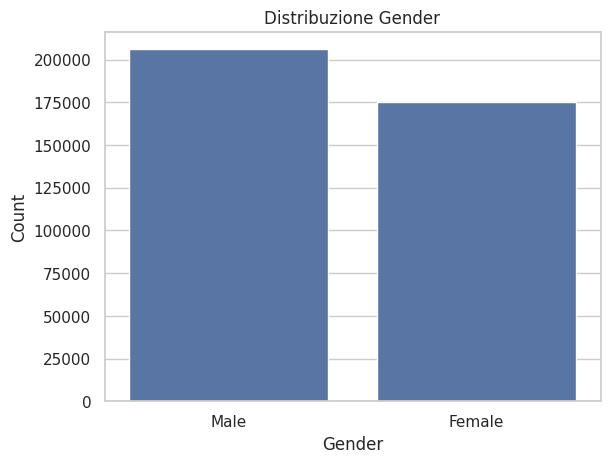

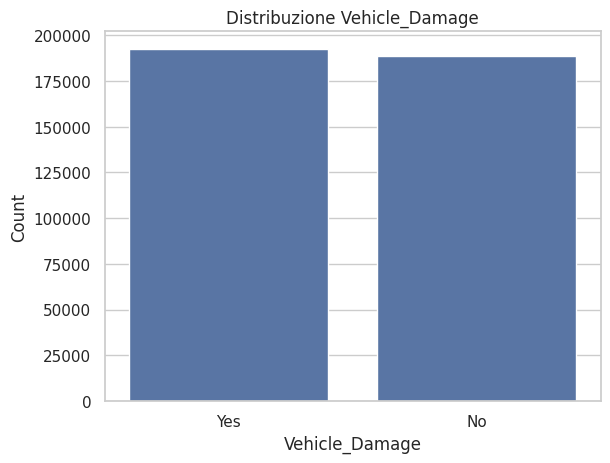

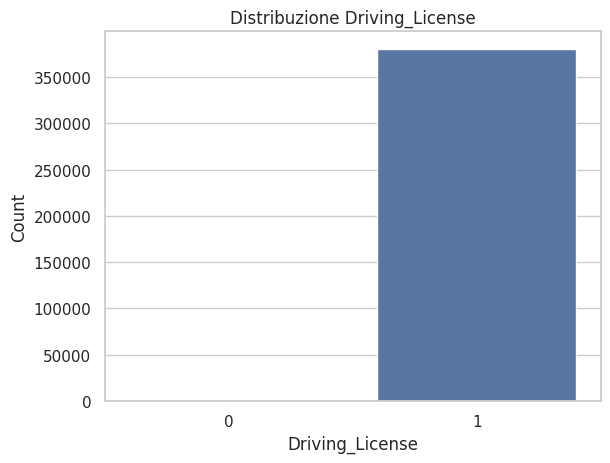

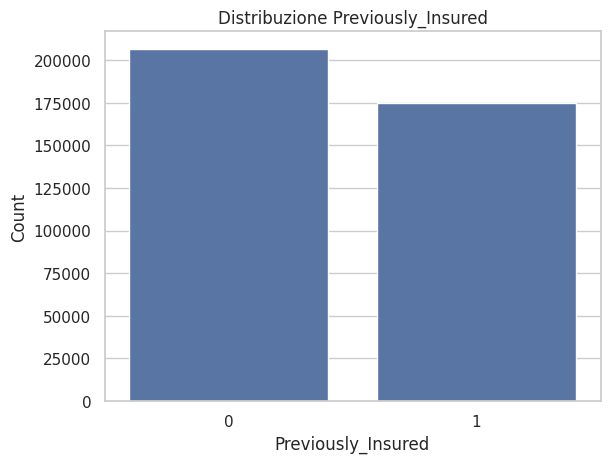

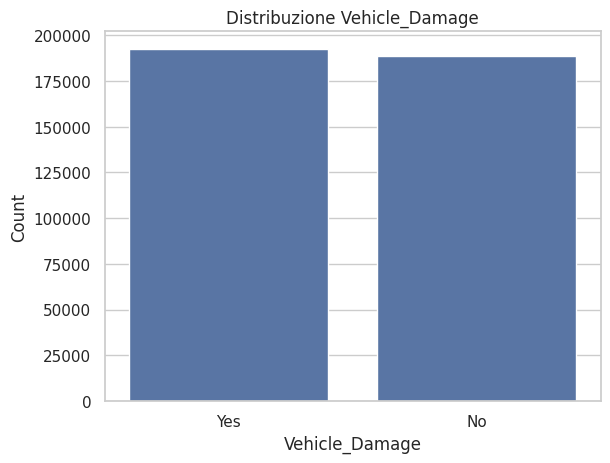

In [ ]:
countplot("Vehicle_Age", df)
countplot("Gender", df)
countplot("Vehicle_Damage", df)
countplot("Driving_License", df)
countplot("Previously_Insured", df)
countplot("Vehicle_Damage", df)

###Analisi grafica variabili continue

In [ ]:
def boxplot(column, data, title=None, ylabel=None):

    plt.figure(figsize=(8, 6))
    sns.set_theme(style="whitegrid")
    sns.boxplot(y=data[column])

    if title is None:
        title = f"Boxplot di {column}"
    if ylabel is None:
        ylabel = column

    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()


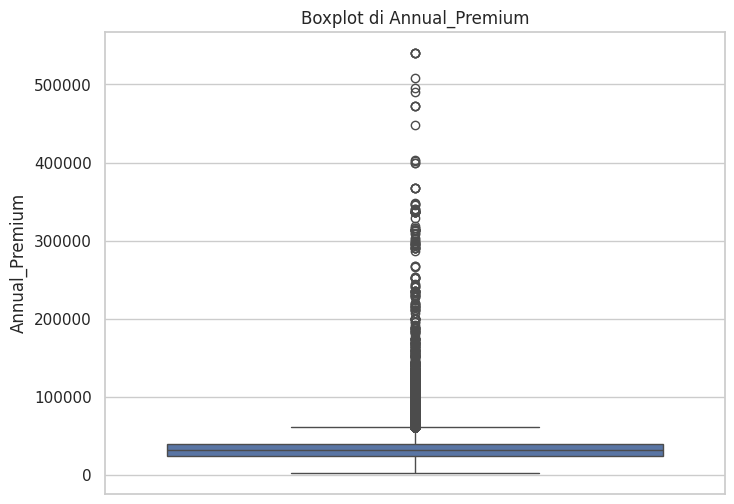

None


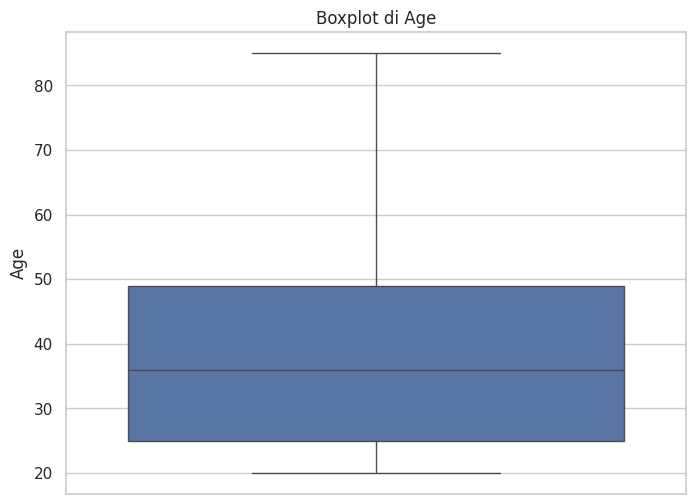

None


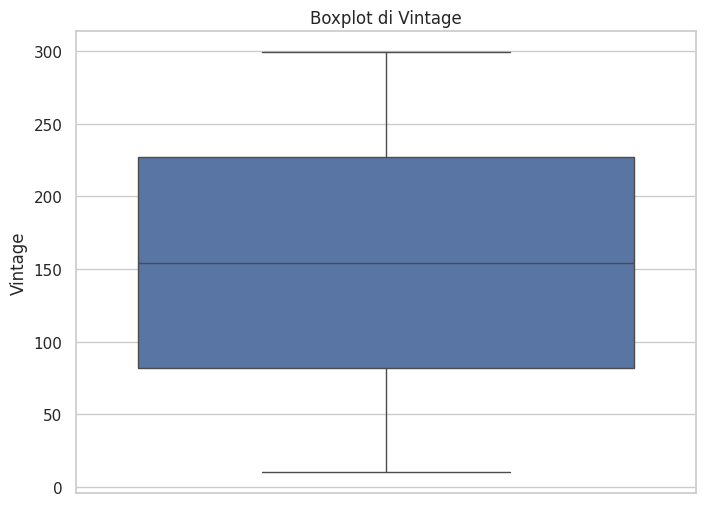

None


In [ ]:
print(boxplot("Annual_Premium", df))
print(boxplot("Age", df))
print(boxplot("Vintage", df))

#Features Encoding

In [ ]:
df["Gender"].value_counts()

,count
Gender,
Male,206089
Female,175020


In [ ]:
mapping = {"Male":1, "Female":0}
df["Gender"] = df["Gender"].map(mapping)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df["Vehicle_Damage"].value_counts()

,count
Vehicle_Damage,
Yes,192413
No,188696


In [ ]:
mapping = {"Yes": 1, "No": 0}
df["Vehicle_Damage"] = df["Vehicle_Damage"].map(mapping)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [ ]:
df["Vehicle_Age"].value_counts()

,count
Vehicle_Age,
1-2 Year,200316
< 1 Year,164786
> 2 Years,16007


In [ ]:
mapping = {"1-2 Year": 0, "< 1 Year": 1, "> 2 Years": 2}
df["Vehicle_Age"] = df["Vehicle_Age"].map(mapping)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


##Correlation Matrix

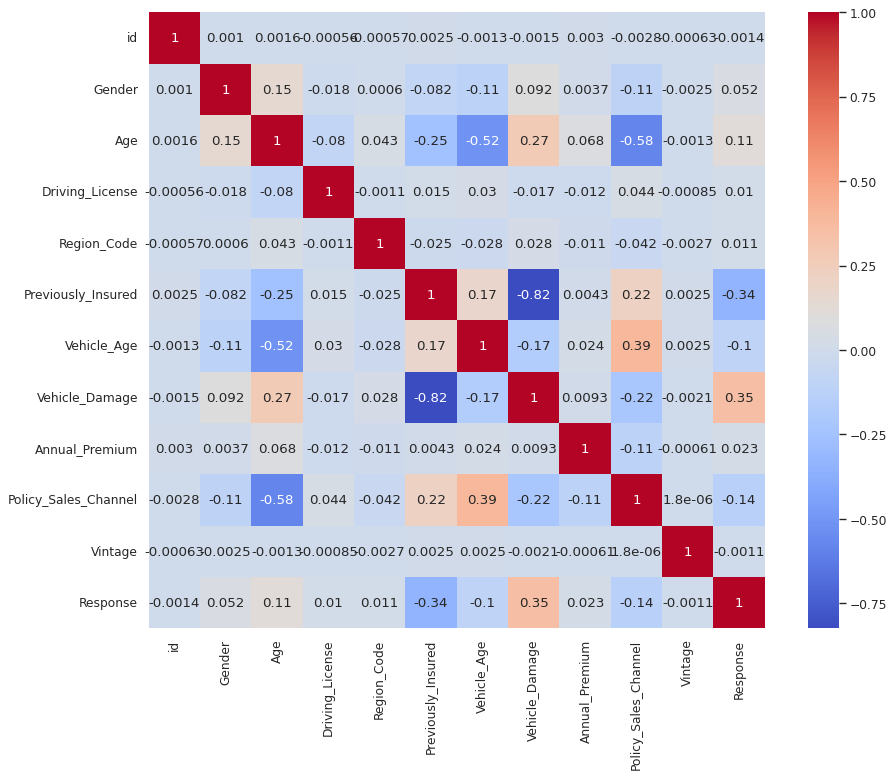

In [ ]:
plt.figure(figsize=(14,10), dpi=80)

hm = sns.heatmap(df.corr(),
                 cbar=True,
                 square=True,
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 annot=True,
                 annot_kws={"size":12},
                 cmap="coolwarm")

plt.show()

#Creiamo il modello

In [ ]:
X = df.drop("Response", axis=1).values
y = df["Response"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=y)
print(f"Dimensione X_train :{X_train.shape}")
print(f"Dimensione X_test :{X_test.shape}")
print(f"Dimensione y_train :{y_train.shape}")
print(f"Dimensione y_test :{y_test.shape}")

Dimensione X_train :(266776, 11)
Dimensione X_test :(114333, 11)
Dimensione y_train :(266776,)
Dimensione y_test :(114333,)


####Verifichiamo che il rapporto tra le classi sia rimasto uguale al dataset originario

In [ ]:
class_counts_train = np.bincount(y_train)
ratio_train = class_counts_train[1]/class_counts_train[0]

class_counts_test = np.bincount(y_test)
ratio_test = class_counts_test[1] / class_counts_test[0]

print(f"Rapporto tra classe 1 e classe 0 in y_train: {ratio_train*100:.2f}%")
print(f"Rapporto tra classe 1 e classe 0 in y_test: {ratio_test*100:.2f}%")

Rapporto tra classe 1 e classe 0 in y_train: 13.97%
Rapporto tra classe 1 e classe 0 in y_test: 13.97%


##Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [ ]:
ss = StandardScaler()
X_train_resampled = ss.fit_transform(X_train_resampled)
X_test = ss.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
y_pred_train = lr.predict(X_train_resampled)

###Valutiamo il modello con Oversampling

In [ ]:
y_pred_train = lr.predict(X_train_resampled)
y_pred_test = lr.predict(X_test)

print("TRAIN REPORT")
print(classification_report(y_train_resampled, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    234079
           1       0.71      0.98      0.82    234079

    accuracy                           0.78    468158
   macro avg       0.83      0.78      0.78    468158
weighted avg       0.83      0.78      0.78    468158

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



##Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
ss = StandardScaler()
X_train_resampled = ss.fit_transform(X_train_resampled)
X_test = ss.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
y_pred_train = lr.predict(X_train_resampled)

###Valutiamo il modello con Undersampling

In [ ]:
y_pred_train = lr.predict(X_train_resampled)
y_pred_test = lr.predict(X_test)

print("TRAIN REPORT")
print(classification_report(y_train_resampled, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     32697
           1       0.71      0.98      0.82     32697

    accuracy                           0.78     65394
   macro avg       0.83      0.78      0.78     65394
weighted avg       0.83      0.78      0.78     65394

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



#Creiamo il modello per class weight balanced

In [ ]:
X = df.drop("Response", axis=1).values
y = df["Response"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=y)
print(f"Dimensione X_train :{X_train.shape}")
print(f"Dimensione X_test :{X_test.shape}")
print(f"Dimensione y_train :{y_train.shape}")
print(f"Dimensione y_test :{y_test.shape}")

Dimensione X_train :(266776, 11)
Dimensione X_test :(114333, 11)
Dimensione y_train :(266776,)
Dimensione y_test :(114333,)


#Class weight balanced

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

#Valutiamo il modello

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    234079
           1       0.25      0.98      0.40     32697

    accuracy                           0.64    266776
   macro avg       0.62      0.78      0.57    266776
weighted avg       0.90      0.64      0.70    266776

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100320
           1       0.25      0.98      0.40     14013

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



####La recall alta indica che il modello gestisce bene i falsi negativi, riuscendo a identificare quasi tutti i positivi (classe 1)

###Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"]):

    cm = confusion_matrix(y_true, y_pred)

    df_cm = pd.DataFrame(cm,
                         index=labels,
                         columns=["Predcted "+ labels[0], "Predicted "+labels[1]])
    sns.heatmap(df_cm, annot=True, fmt='g')


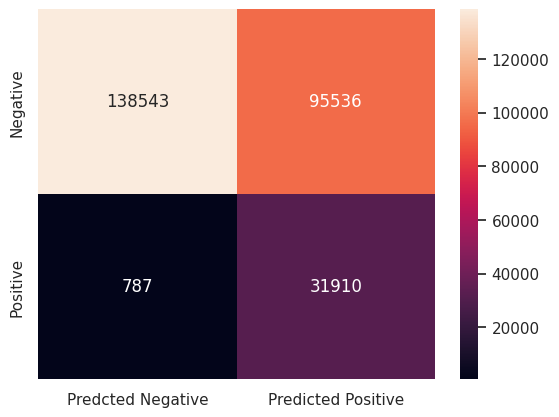

In [ ]:
plot_confusion_matrix(y_train, y_pred_train)

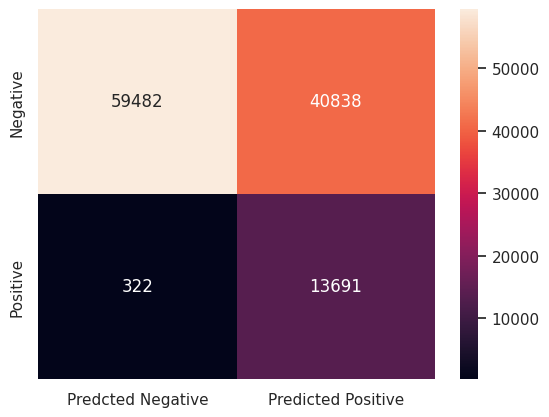

In [ ]:
plot_confusion_matrix(y_test, y_pred_test)

###ROC Curve


In [ ]:
y_proba_train = lr.predict_proba(X_train)
y_proba_test = lr.predict_proba(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_proba_train[:,1])
auc_score = roc_auc_score(y_train, y_proba_train[:,1])
print(f"AUC Score : {auc_score}")

AUC Score : 0.820289176975338


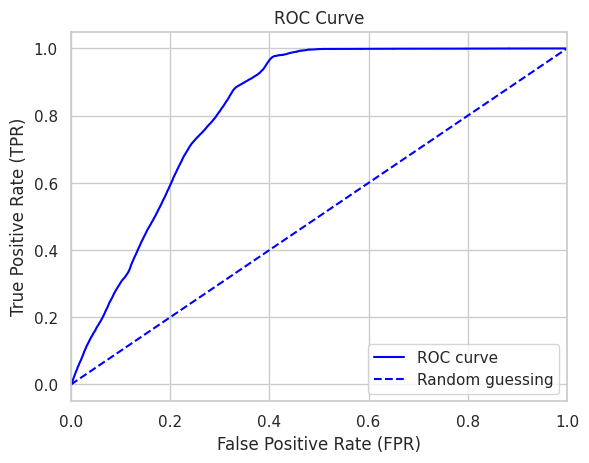

In [ ]:
plt.plot(fpr, tpr, color="blue", label="ROC curve")
plt.plot([0, 1], [0, 1], color="blue", linestyle="--", label="Random guessing")
plt.xlim([0.0, 1.0])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_proba_test[:,1])
auc_score = roc_auc_score(y_test, y_proba_test[:,1])
print(f"AUC Score : {auc_score}")

AUC Score : 0.8192311136867556


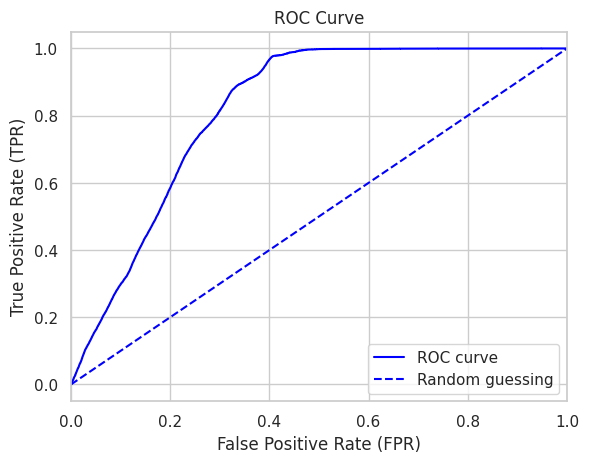

In [ ]:
plt.plot(fpr, tpr, color="blue", label="ROC curve")
plt.plot([0, 1], [0, 1], color="blue", linestyle="--", label="Random guessing")
plt.xlim([0.0, 1.0])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()